# Implementing a Perceptron

## 1) Installing Libraries

In [6]:
%pip install numpy pandas matplotlib

     |████████████████████████████████| 21.2 MB 6.9 MB/s eta 0:00:01
     |████████████████████████████████| 12.6 MB 9.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.9 MB 11.8 MB/s eta 0:00:01
  Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
  Using cached tzdata-2025.1-py2.py3-none-any.whl (346 kB)
     |████████████████████████████████| 265 kB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 3.2 MB 15.5 MB/s eta 0:00:01
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
     |████████████████████████████████| 107 kB 27.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 12.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 6.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install watermark

You should consider upgrading via the '/usr/local/bin/python3.9 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
%load_ext watermark
%watermark -v -p numpy,pandas,matplotlib

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.7
IPython version      : 8.18.1

numpy     : 2.0.2
pandas    : 2.2.3
matplotlib: 3.9.4



## 2) Loading the Dataset

In [9]:
import pandas as pd

df = pd.read_csv("perceptron_toydata-truncated.txt", sep="\t")
df

,x1,x2,label
0,0.77,-1.14,0
1,-0.33,1.44,0
2,0.91,-3.07,0
3,-0.37,-1.91,0
4,-0.63,-1.53,0
5,0.39,-1.99,0
6,-0.49,-2.74,0
7,-0.68,-1.52,0
8,-0.10,-3.43,0
9,-0.05,-1.95,0


In [10]:
X_train = df[["x1", "x2"]].values
y_train = df["label"].values

In [11]:
X_train

array([[ 0.77, -1.14],
       [-0.33,  1.44],
       [ 0.91, -3.07],
       [-0.37, -1.91],
       [-0.63, -1.53],
       [ 0.39, -1.99],
       [-0.49, -2.74],
       [-0.68, -1.52],
       [-0.1 , -3.43],
       [-0.05, -1.95],
       [ 3.88,  0.65],
       [ 0.73,  2.97],
       [ 0.83,  3.94],
       [ 1.59,  1.25],
       [ 1.14,  3.91],
       [ 1.73,  2.8 ],
       [ 1.31,  1.85],
       [ 1.56,  3.85],
       [ 1.23,  2.54],
       [ 1.33,  2.03]])

In [12]:
X_train.shape

(20, 2)

In [13]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
y_train.shape

(20,)

In [14]:
import numpy as np

np.bincount(y_train)

array([10, 10])

## 3) Visualizing the dataset

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


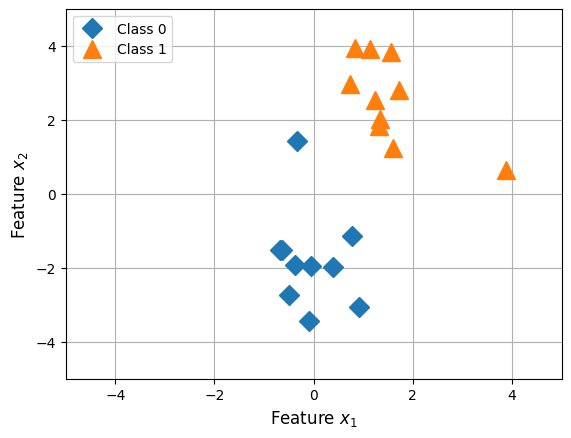

In [17]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=10,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=13,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()